<a href="https://colab.research.google.com/github/yussouf88/Deep_learning/blob/main/model_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [212]:
import torch
import torch.nn as nn
import torch.nn.functional as f

class model(nn.Module):
  def __init__(self, ip=4, h1=8, h2=9, op=3):
    super().__init__()
    self.fc1 = nn.Linear(ip,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,op)
  def forward(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.out(x)
    return x

In [213]:
torch.manual_seed(41)
model = Model()

In [214]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import matplotlib.pyplot as plt
%matplotlib inline
ur = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(ur)
df['species']=df['species'].replace('setosa',0)
df['species']=df['species'].replace('versicolor',1)
df['species']=df['species'].replace('virginica',2)
x = df.drop('species',axis = 1)
y = df['species']
x = x.values
y = y.values
y = pd.to_numeric(y)

In [215]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 41)
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [216]:
critereon = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = .01)

In [219]:
ep = 200
losses = []
for i in range(ep):
  y_pred = model.forword(x_train)
  loss = critereon(y_pred,y_train)
  losses.append(loss.detach().numpy())
  #if i%10 ==0:
  #  print(f'for epoch {i} loss= {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


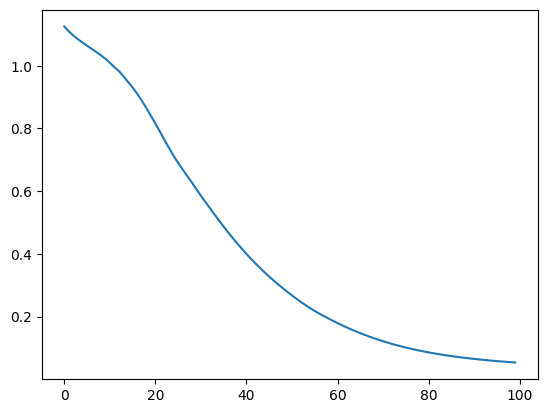

In [218]:
plt.plot(range(ep),losses)
plt.show()